# 1. Initializing method of mu

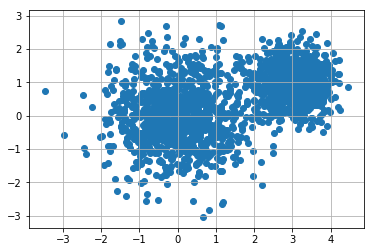

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
#plt.scatter(mu[0][0], mu[0][1], color='red')
#plt.scatter(mu[1][0], mu[1][1], color='red')
plt.grid()
plt.show()

1) fixed point

In [3]:
mu = np.array([[-1,1], [0,-1]])

2) random point

In [4]:
index = np.random.randint(0, len(X_data), size=2)
mu = X_data[index]

#### Exercise1 
3) kmeans++ algorithm 

1. discuss how kmeans++ algorithm works for arbitrary k
2. make your code if k=2 (using the data above)

# 2. Make kmeans code in 1 box!

Assume that.. 
1) the number of clustering k=3, 
2) iterations =10 and 
3) we have randomly initialized center

Result : print J for every iterations

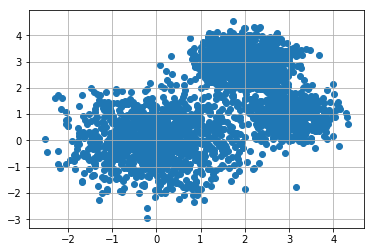

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.grid()

In 1 iteration : 13476.728712231417


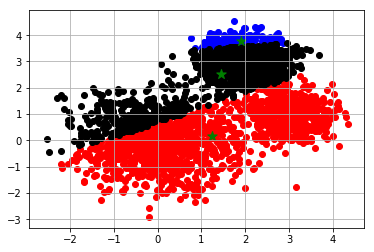

In 2 iteration : 6234.922607758581


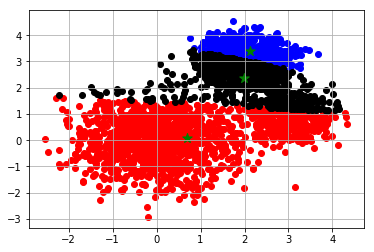

In 3 iteration : 4614.529747682075


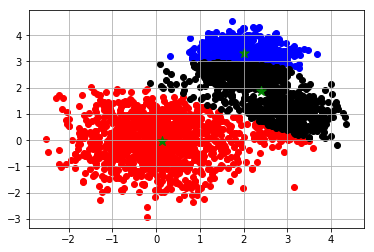

In 4 iteration : 3224.336464086606


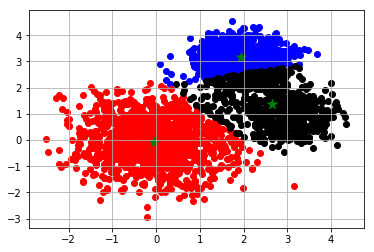

In 5 iteration : 2730.1487036017375


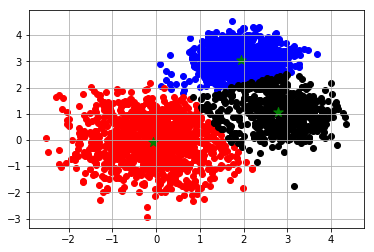

In 6 iteration : 2607.2077012311574


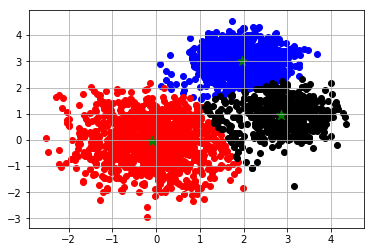

In 7 iteration : 2592.7970816108455


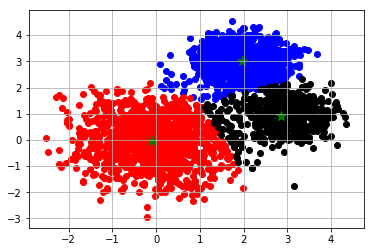

In 8 iteration : 2592.2688610214636


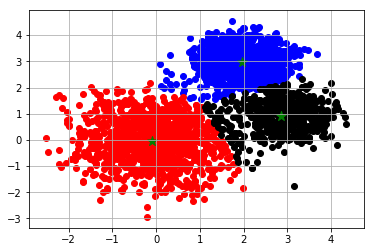

In 9 iteration : 2592.251896618796


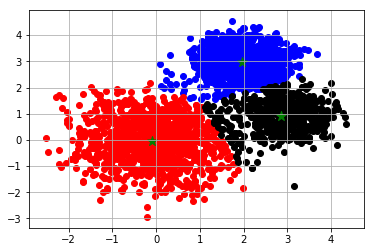

In 10 iteration : 2592.2487793947753


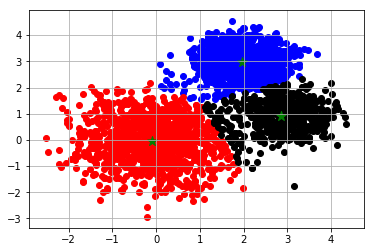

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')


# parameters
k = 3
iterations = 10




#step1) initialize center
index = np.random.randint(0, len(X_data), size=k)
mu = X_data[index]


for i in range(iterations):

    
    #step2) clustering
    a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1)).reshape(-1,1)
    b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1)).reshape(-1,1)
    c = np.sqrt(np.sum((X_data - mu[2])**2, axis=1)).reshape(-1,1)
    dist = np.vstack([a.T, b.T, c.T])
    cluster = np.argmin(dist, axis=0)

    
    #step3) find new center
    mu = []
    for l in range(k):
        mu.append(np.average(X_data[cluster==l], axis=0)) 
    
    
    #print loss
    J = np.sum((np.min(dist, axis=0))**2)
    print("In", i+1,"iteration :",J)

    #draw picture
    plt.figure()
    plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
    plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
    plt.scatter(X_data[cluster==2][:,0], X_data[cluster==2][:,1], c='k')
    plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[2][0],mu[2][1], color ='green', marker="*", s=100 )
    plt.grid()
    plt.show()

# 3. Tolerance

#### (1) for statement

In [7]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


#### (2) if statement

In [8]:
money = 3000

if money > 2000:
    print('get a taxi')
elif money <=2000:
    print("take a bus")

get a taxi


#### (3) for and if statement with 'break'

In [9]:
for i in range(10):
    print(i)
    if i==5:
        break

0
1
2
3
4
5


#### (4) Exercise 2 : Make your one-box code with 1e-5 Tolerance with loss function J

# 4. Use package : scikit learn

Scikit-learn is a free software machine learning library for the Python programming language. Wikipedia

In [10]:
import numpy as np

X_data = np.load('data.npy')

In [11]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, init='random').fit(X_data)
mu = kmeans_model.cluster_centers_
y_hat = kmeans_model.labels_

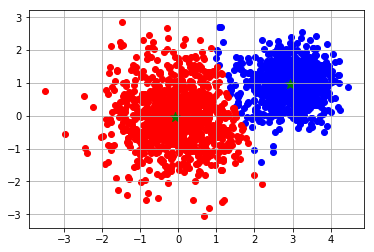

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_data[kmeans_model.labels_==0][:,0], X_data[kmeans_model.labels_==0][:,1], c='b')
plt.scatter(X_data[kmeans_model.labels_==1][:,0], X_data[kmeans_model.labels_==1][:,1], c='r')
plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
plt.grid()
plt.show()

### Exercise3 : make 2 models using sklearn!
model 1) cluster=3, iteration=20, tol = 0.0001, initializer = kmeans++

model 2) cluster=3, iteration=20, tol = 0.0001, initializer = random

Result : print mu, labels and the number of iterations run for each initializer

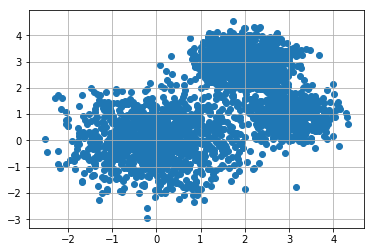

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.grid()

# 4. Broadcasting

#### time advantage

In [14]:
import time

start = time.time()
print(start)

1573184335.3930857


In [18]:
A = np.random.rand(30,30,100)
B = np.random.rand(30,30)

In [22]:
start = time.time()

B = B.reshape(30,30,-1)
A-B

print(time.time() - start)

0.0009965896606445312


In [23]:
start = time.time()

for i in range(100):
    A[:,:,i]-B

print(time.time() - start)

0.0059833526611328125
